In [1]:
import pandas as pd
import warnings 
import numpy as np
import talib
import talib.abstract as abstract

warnings.filterwarnings('ignore')

df = pd.read_csv('../price.csv',index_col=['stock_id','date'],parse_dates=['date'])
df = df.rename(columns={
    '開盤價':'open',
    '最高價':'high',
    '最低價':'low',
    '收盤價':'close',
    '成交金額':'volume'
})
df = df[['open','high','low','close','volume']]
df = df.loc[df['volume']>0]
df = df.apply(pd.to_numeric,errors='coerce')
df = df.loc['2330']
df

,open,high,low,close,volume
date,,,,,
2007-01-02,67.8,68.0,67.3,67.7,1768131919
2007-01-03,67.8,68.7,67.5,68.0,2875024398
2007-01-04,67.7,68.1,67.6,67.7,1514454033
2007-01-05,67.5,67.7,66.5,66.9,2048997239
2007-01-08,66.1,66.5,65.7,65.8,1595029837
...,...,...,...,...,...
2022-06-20,500.0,502.0,495.0,498.0,18267359790
2022-06-21,501.0,505.0,499.0,505.0,17298234720
2022-06-22,501.0,503.0,494.5,494.5,16630857096


In [3]:
abstract.WILLR(df)

date
2007-01-02           NaN
2007-01-03           NaN
2007-01-04           NaN
2007-01-05           NaN
2007-01-08           NaN
                 ...    
2022-06-20    -95.384615
2022-06-21    -83.333333
2022-06-22   -100.000000
2022-06-23    -99.166667
2022-06-24    -97.500000
Length: 3813, dtype: float64

4 -90 -40 233.15000000000003
4 -90 -37 254.45000000000005
4 -90 -36 264.15
4 -90 -35 268.65000000000003
4 -90 -34 269.65000000000003
4 -90 -20 274.54999999999995
4 -90 -19 278.85
4 -90 -18 282.95
4 -90 -15 302.9
4 -90 -13 315.0
4 -90 -12 335.2
4 -90 -11 339.09999999999997
4 -90 -8 355.5
4 -87 -8 359.09999999999997
4 -84 -9 362.7
4 -84 -8 379.09999999999997
4 -83 -9 385.1
4 -83 -8 401.5
4 -82 -8 417.7
4 -81 -8 419.55
4 -80 -8 419.75
4 -77 -11 432.15
4 -77 -9 438.45
4 -77 -8 452.25
4 -75 -8 454.35
4 -74 -11 459.35
4 -74 -9 464.1500000000001
4 -74 -8 477.95000000000005
4 -64 -11 562.9000000000001
4 -64 -8 568.9000000000001
4 -63 -11 579.4000000000001
4 -62 -11 618.6
4 -62 -10 634.7
4 -62 -8 644.1


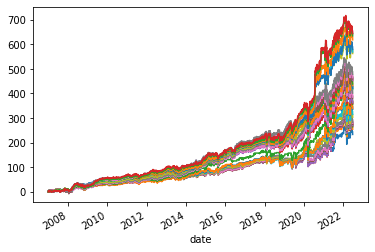

In [11]:
highest_earning = 0

for timeperiod in range(4,50,2):

    willr = abstract.WILLR(df,timeperiod = timeperiod)

    df['willr'] = willr

    
    for willrLow in range(-90,-60,1):
        for willrHigh in range(-40,-5,1):
            df['hold'] = np.nan
            df.loc[df['willr']<willrLow,'hold'] = 1
            df.loc[df['willr']>willrHigh,'hold'] = 0

            df['hold'].ffill(inplace=True)
            df['hold'] = df['hold'].fillna(0)

            df['earn'] = 0
            df.loc[df['hold']==1,'earn'] = df['open'].shift(-2)-df['open'].shift(-1)

            
            if df['earn'].cumsum().dropna().iloc[-1]>highest_earning:
                print(timeperiod,willrLow,willrHigh,df['earn'].cumsum().dropna().iloc[-1])
                df['earn'].cumsum().plot()
                highest_earning = df['earn'].cumsum().dropna().iloc[-1]
            

48 -61 -6 644.1


Start date,2007-01-02
End date,2022-06-24
Total months,181
,Backtest
Annual return,25.911%
Cumulative returns,3166.178%
Annual volatility,22.484%
Sharpe ratio,1.14
Calmar ratio,0.81
Stability,0.98
Max drawdown,-31.808%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,31.81,2008-06-30,2008-10-23,2009-04-28,217
1,23.50,2020-01-16,2020-03-17,2020-04-15,65
2,20.29,2007-11-05,2008-01-18,2008-03-10,91
3,17.50,2011-06-13,2011-08-05,2011-11-18,115
4,16.61,2015-07-16,2015-08-21,2015-11-03,79


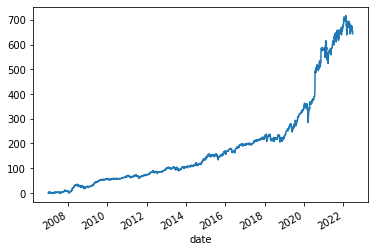

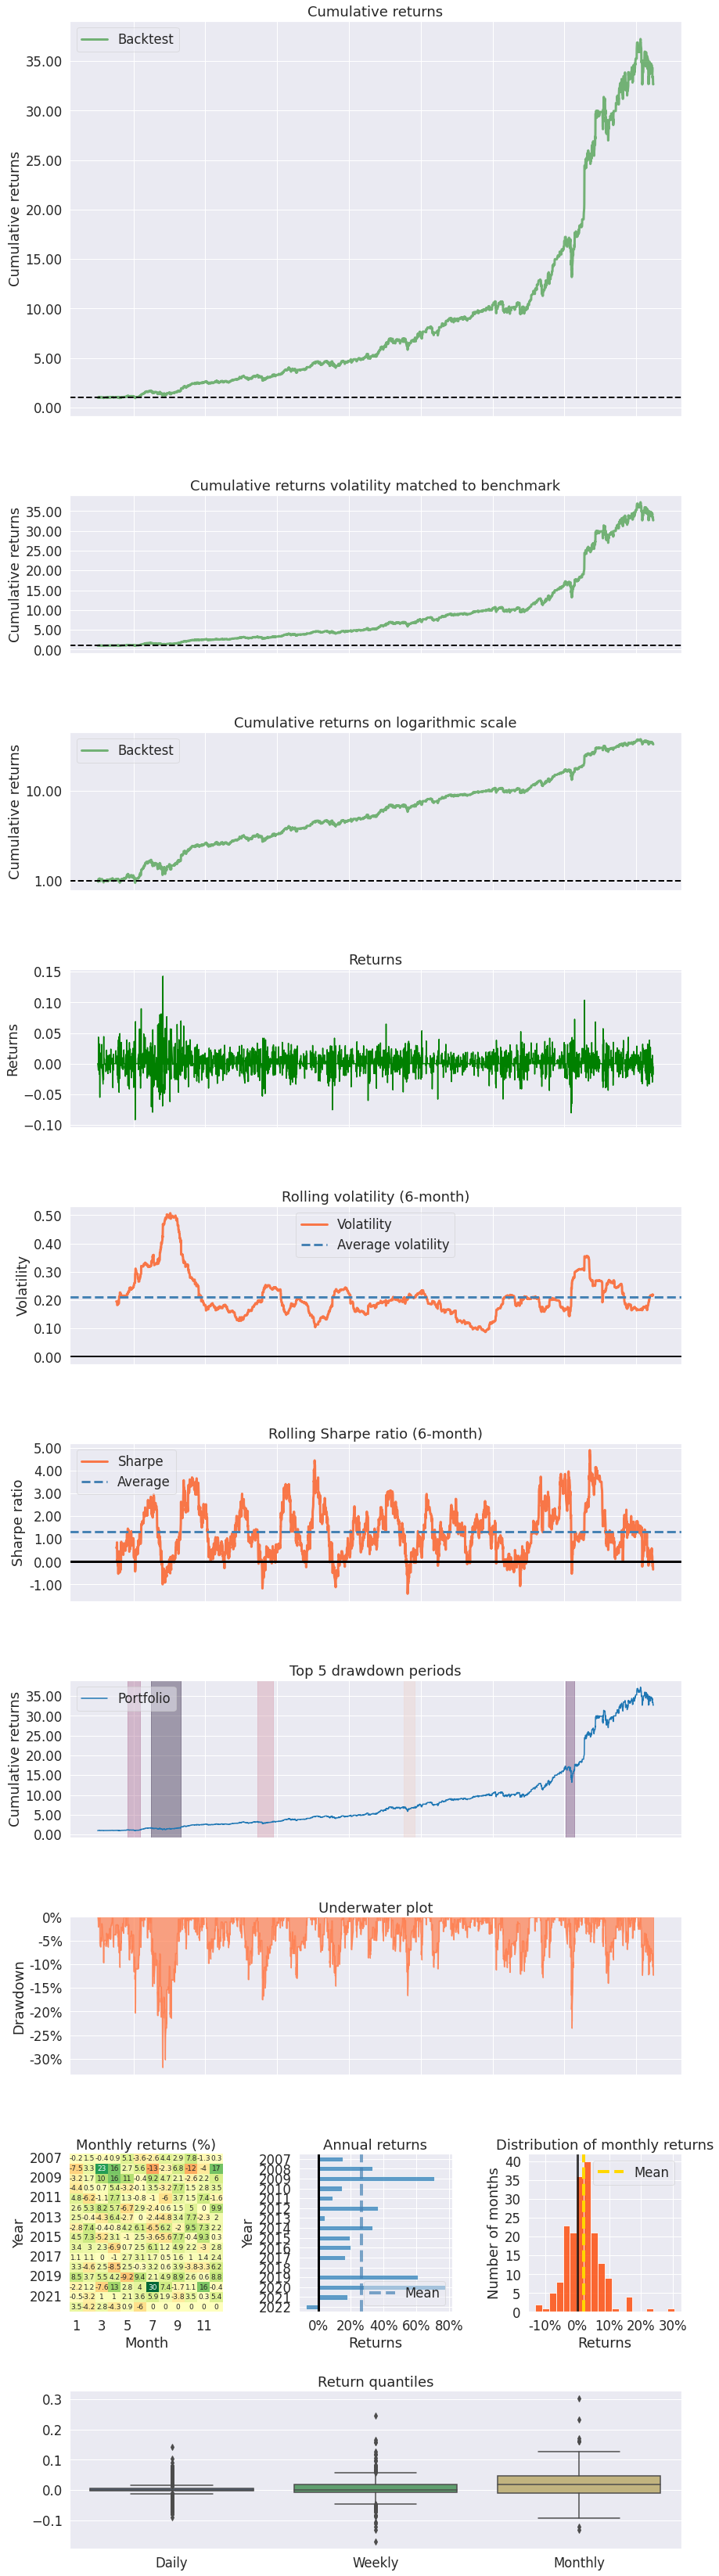

In [14]:

willr = abstract.WILLR(df,timeperiod = 4)

df['willr'] = willr

df['hold'] = np.nan
df.loc[df['willr']<-62,'hold'] = 1
df.loc[df['willr']>-8,'hold'] = 0

df['hold'].ffill(inplace=True)
df['hold'] = df['hold'].fillna(0)

df['earn'] = 0
df.loc[df['hold']==1,'earn'] = df['open'].shift(-2)-df['open'].shift(-1)


print(timeperiod,willrLow,willrHigh,df['earn'].cumsum().dropna().iloc[-1])
df['earn'].cumsum().plot()

import pyfolio as pf
pf.create_returns_tear_sheet(df['earn']/df['open'].shift(-1))